# Dragon Real Estate housing price prediciton

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

In [2]:
housing = pd.read_csv("Desktop/data/Realestate.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PIRATED  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing['AGE'].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [7]:
housing['PIRATED'].value_counts()

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
20.1      5
16.1      5
16.9      5
16.8      4
14.9      4
19.0      4
18.5      4
17.0      4
18.2      4
18.3      4
12.6      3
14.8      3
18.9      3
15.3      3
15.9      2
22.0      2
15.6      2
18.8      2
15.5      1
17.3      1
15.1      1
21.1      1
13.6      1
14.4      1
Name: PIRATED, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001968862AA08>,
      dtype=object)

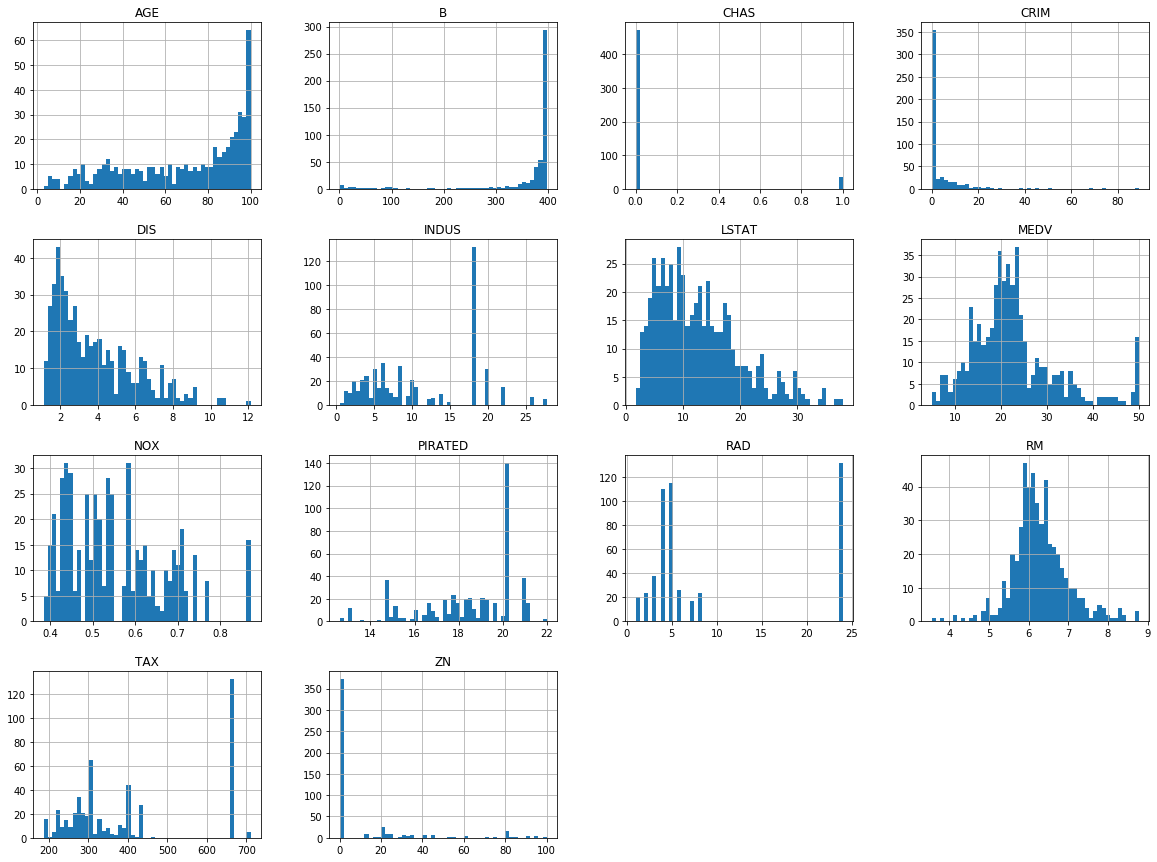

In [10]:
housing.hist(bins = 50, figsize = (20,15))

# Train - Test Spliting

In [11]:
# for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
 # train_set, test_set = split_train_test(housing, 0.2)

In [13]:
 # print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PIRATED  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
95/7

13.571428571428571

In [21]:
376/28

13.428571428571429

In [22]:
housing = strat_train_set.copy()

#  Looking for Correlations

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PIRATED   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001968860F948>,
      dtype=object)

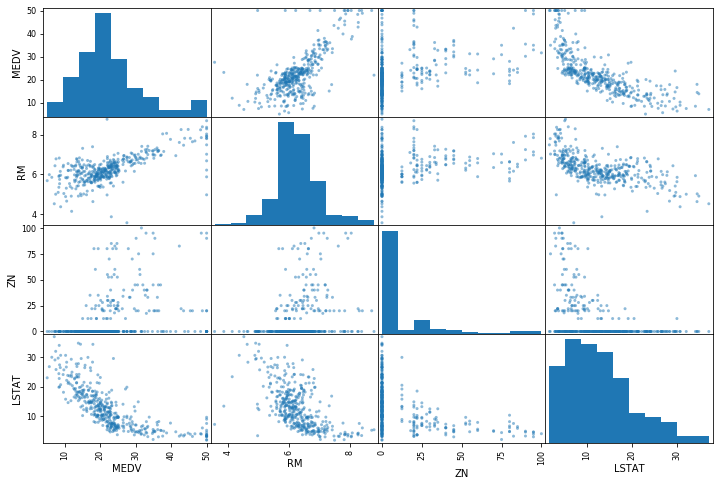

In [25]:
from pandas.plotting import scatter_matrix
atrributes = ['MEDV','RM', 'ZN', 'LSTAT']
scatter_matrix(housing[atrributes], figsize = (12,8))

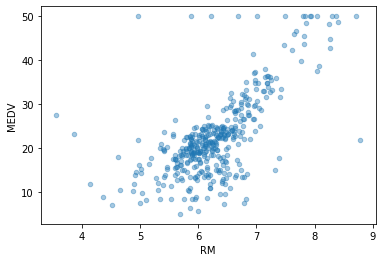

In [26]:
housing.plot(kind ="scatter", x="RM", y="MEDV", alpha=0.4)

#  Trying out atrribute combinations

In [27]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [28]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [30]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PIRATED   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

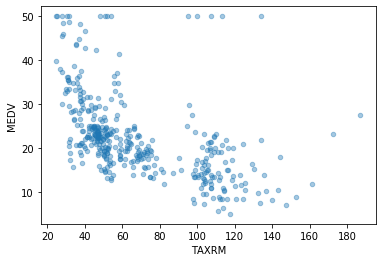

In [31]:
housing.plot(kind ="scatter", x="TAXRM", y="MEDV", alpha=0.4)

In [32]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [33]:
# In case if some values are missing from the given  data 

# Missing atrributes 

#  To take care of missing atrributes, you  have three options:
#  1. Get rid of the missing data poinnts.
#  2. Get rid of the whole atrributes.
#  3. Set the value to some value( 0, mean or median )

In [34]:
# for option 1 

a = housing.dropna(subset=['RM'])
a.shape
# Note that the original houisng dataframe will remain unchanged

(404, 13)

In [35]:
# For option 2 

housing.drop(['RM'], axis=1)
# Note that there is no RM column and also note that original housing dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [36]:
# Compute median For option 3

median = housing['RM'].median()
housing['RM'].fillna(median)
# Note that the original houisng dataframe will remain unchanged
# housing.shape

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
# This is an easy an alternatuve option 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATED,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


#  Scikit learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. eg. imputer. It has fit method and transform method .Fit method - Fits the dataset and calulates internal paremeters

2. Transformers - transform method takes input and return outputs based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict are two common functions. It will also gives score() function which will evaluate the predictions.

#  Feature Scaling

Primarily, two types of features scaling methods:

1. Min-Max scaling (Normalization)
   (value-min)/(max-min)
   Sklearn provies a class called MinMaxscaler for this
   
2. Standardization- 
   (value - mean)/ std
   Sklearn provides a class called StandardScaler for this 

#  Createting a pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .........add as many you want in pipeline
    ('std_scaler', StandardScaler()),
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [45]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
X=housing.iloc[:, 0].values
y=housing.iloc[:, 1].values

regressor=LinearRegression()
X=X.reshape(-1,1)
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
some_data = housing.iloc[:5]

In [52]:
some_labels = housing_labels.iloc[:5]

In [53]:
prepared_data = my_pipeline.transform(some_data)

In [54]:
model.predict(prepared_data)

array([22.481, 25.234, 16.432, 23.325, 23.556])

In [55]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

#  Evaluating the model

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [57]:
rmse

1.2114241424745888

#  Using better evaluation technique - Cross Validation 

In [58]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [59]:
rmse_scores

array([2.70873021, 2.86218011, 4.50005744, 2.54916117, 3.39515247,
       2.65848441, 4.3845032 , 3.30540912, 3.54111292, 3.0918128 ])

In [60]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [61]:
print_scores(rmse_scores)

Scores: [2.70873021 2.86218011 4.50005744 2.54916117 3.39515247 2.65848441
 4.3845032  3.30540912 3.54111292 3.0918128 ]
Mean:  3.299660384152974
Standard deviation:  0.6514162949392844


Convert this notebook into a python file and run the pipeline using Visual Studio Code

# Saving the model

In [62]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test data

In [63]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [64]:
final_rmse

2.9204369200380897

In [65]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [66]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.917])

And we have predicted the value here 24.917